In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai import *
from fastai.vision import *

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
path = Path('/content/drive/My Drive/viwi')
#tfms = get_transforms(do_flip=False)
path.ls()

[PosixPath('/content/drive/My Drive/viwi/__pycache__'),
 PosixPath('/content/drive/My Drive/viwi/data_feed.py'),
 PosixPath('/content/drive/My Drive/viwi/build_net.py'),
 PosixPath('/content/drive/My Drive/viwi/.ipynb_checkpoints'),
 PosixPath('/content/drive/My Drive/viwi/models'),
 PosixPath('/content/drive/My Drive/viwi/test'),
 PosixPath('/content/drive/My Drive/viwi/train'),
 PosixPath('/content/drive/My Drive/viwi/main_beam.py')]

In [7]:
(path/'train').ls()

[PosixPath('/content/drive/My Drive/viwi/train/1'),
 PosixPath('/content/drive/My Drive/viwi/train/2'),
 PosixPath('/content/drive/My Drive/viwi/train/3'),
 PosixPath('/content/drive/My Drive/viwi/train/4'),
 PosixPath('/content/drive/My Drive/viwi/train/5'),
 PosixPath('/content/drive/My Drive/viwi/train/6'),
 PosixPath('/content/drive/My Drive/viwi/train/7'),
 PosixPath('/content/drive/My Drive/viwi/train/8'),
 PosixPath('/content/drive/My Drive/viwi/train/9'),
 PosixPath('/content/drive/My Drive/viwi/train/10')]

In [8]:
data = (ImageList.from_folder(path) #Where to find the data? -> in path and its subfolders
        .split_none()              #How to split in train/valid? -> use the folders
        .label_from_folder()            #How to label? -> depending on the folder of the filenames
        .add_test_folder()              #Optionally add a test set (here default name is test)
        .databunch(bs=6))                   #Finally? -> use the defaults for conversion to ImageDataBunch

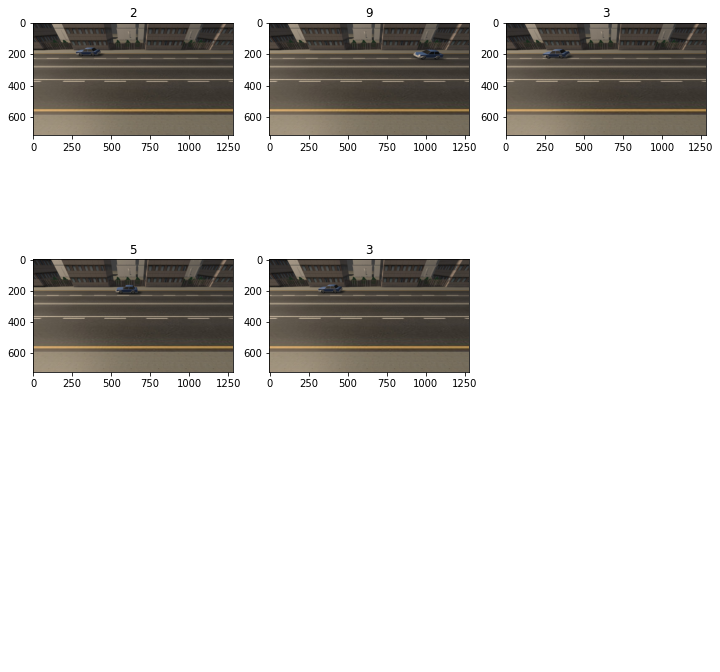

In [10]:
data.show_batch(3, figsize=(10,10), hide_axis=False)

In [11]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [12]:
learn.fit_one_cycle(1)

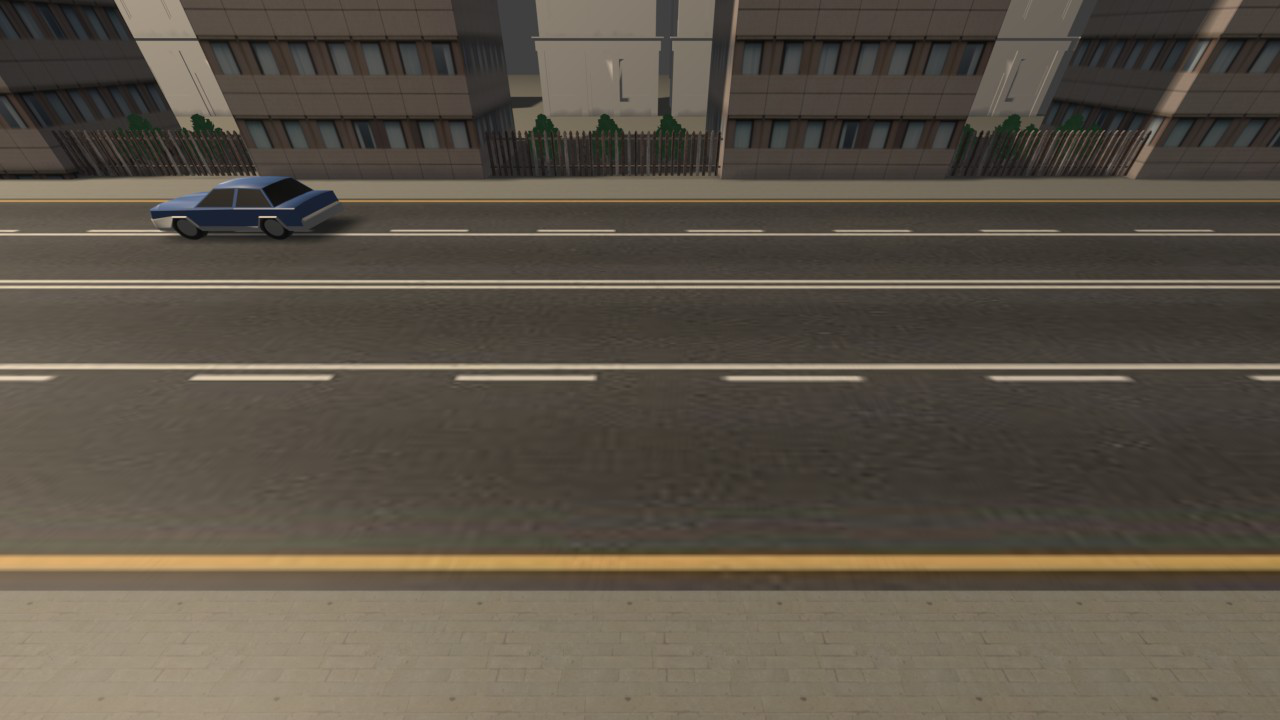

In [17]:
data = learn.data.test_ds[100][0]
data

In [18]:
pred = learn.predict(data)
pred

(Category tensor(2),
 tensor(2),
 tensor([7.6303e-04, 1.0305e-05, 9.9902e-01, 1.4112e-04, 5.7590e-05, 1.1190e-06,
         2.7623e-06, 6.9973e-06, 4.5836e-07, 7.4970e-07]))

In [20]:
learn.save("/content/drive/My Drive/BT_data/model_vision")